In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

In [2]:
df0 = pd.read_csv('deflection-punch-FE.csv')

In [3]:
df = pd.read_csv('Deflection-Punch-Energy-2.csv')

In [23]:
df = df0

In [46]:
df2 = df[ abs(df['Y']) <= 0.0001]

In [47]:
df2 = df2.sort_values(by=['X'])

In [12]:
df0

,Unnamed: 0,X,Y,U-U1,U-U2,U-U3,S11,S22,S12
0,2,-10.0000,0.0000,-2.787410e-02,-2.044550e-08,-1.601090,-0.000066,0.060121,-2.390220e-07
1,5,-50.0000,0.0000,7.727780e-40,2.301210e-40,-0.000000,-0.197062,-0.059095,1.779000e-06
2,6,-50.0000,-50.0000,2.802600e-45,1.401300e-45,0.000000,0.000537,0.000543,-1.007560e-04
3,11,0.0000,-50.0000,3.002170e-40,1.005920e-39,-0.000000,-0.054688,-0.182646,-6.543040e-05
4,12,0.0000,-20.0000,8.892720e-08,-1.500050e-02,-1.337050,0.159621,0.000300,2.092350e-05
...,...,...,...,...,...,...,...,...,...
34007,102023,21.4363,33.5083,5.490260e-03,1.027220e-02,-0.775735,0.033165,0.047905,-1.162700e-02
34008,102024,22.2973,33.7733,5.502690e-03,1.003560e-02,-0.757158,0.032498,0.047026,-1.181140e-02
34009,102029,22.1756,33.3769,5.691420e-03,1.014150e-02,-0.772764,0.033050,0.047002,-1.196790e-02
34010,102030,28.7767,30.4933,8.226200e-03,8.445240e-03,-0.762117,0.034935,0.037381,-1.466790e-02


In [48]:
df2.to_clipboard()

In [14]:
r2_score(df['W'], -df0.iloc[:,5:6])

0.9753081586936011

In [98]:
r2_score(df0['V'], df['V'])

0.988280148948191

In [99]:
r2_score(df0['Sig_x'], df['Sig_x'])

0.9182407993867345

In [100]:
r2_score(df0['Sig_y'], df['Sig_y'])

0.8672083455700109

In [101]:
r2_score(df0['Sig_xy'], df['Sig_xy'])

0.9907993111810526

In [95]:
data = pd.read_csv('CH-3-Hole.csv')

In [51]:
clms = data.columns

In [52]:
data = data.drop(columns=[*clms[0:5],clms[7], *clms[8:11]])

In [61]:
data.columns = df.columns[1:]

In [62]:
data

,X,Y,U,V,Sig_x,Sig_y,Sig_xy
0,-4.45430,-1.27477,0.029345,-0.005826,0.150279,0.018880,0.100110
1,-4.74876,-1.79820,0.019337,0.001731,-0.022133,-0.357751,-0.094392
2,-4.93306,-2.36980,0.013417,0.010120,-0.029857,-0.762444,-0.103794
3,-4.99981,-2.96665,0.011343,0.019367,-0.028680,-1.044010,0.013517
4,-4.94635,-3.56484,0.013659,0.030275,-0.069404,-1.055810,0.189241
...,...,...,...,...,...,...,...
10978,4.75571,-5.49709,0.377218,0.103507,1.053310,-0.009103,0.221930
10979,4.88097,-5.46438,0.379585,0.102548,1.049730,-0.004062,0.218134
10980,5.23157,-5.76316,0.380566,0.101626,1.075260,0.000740,0.203850
10981,5.42644,-5.51796,0.387034,0.099269,1.054680,0.014557,0.200985


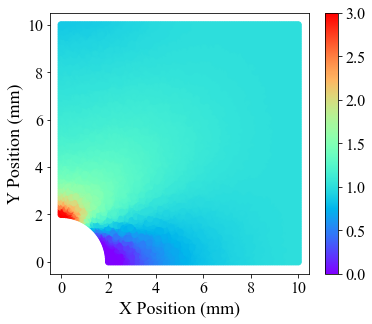

In [135]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(5.8, 4.8)) 
surf = ax.scatter(df['X'], df['Y'], c = df0['Sig_x'], vmin=0, vmax=3.0, cmap=cm.rainbow)
#cbar = fig.colorbar(ax)
cb = fig.colorbar(surf)
cb.ax.locator_params(nbins=7)
cb.ax.tick_params(labelsize=16)
#cb.set_label(label =r'$\sigma_xx (MPa)$', fontsize=16)
#cb.set_label(fontsize=16)
ax.axis('equal')
ax.set_xlabel('X Position (mm)', fontsize=18)
ax.set_ylabel('Y Position (mm)', fontsize=18)
#plt.yticks(ticks=[-10, -5, 0, 5, 10])
for tick in ax.get_xticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
#plt.savefig('CH-3-Hole-Stress-FE.png', dpi=600, transparent=True)
plt.show()

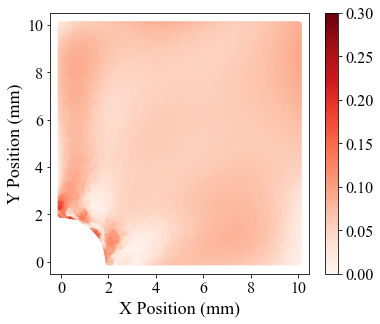

In [113]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(5.8, 4.8)) 
#surf = ax.scatter(df['X'], df['Y'], c = df['Sig_x'], vmin=0, vmax=6.0, cmap=cm.rainbow)
surf = ax.scatter(df['X'], df['Y'], c = abs(df['Sig_x'] - df0['Sig_x']), vmin=0, vmax=0.3, cmap=cm.Reds)
#cbar = fig.colorbar(ax)
cb = fig.colorbar(surf)
cb.ax.locator_params(nbins=7)
cb.ax.tick_params(labelsize=16)
#cb.set_label(label =r'$\sigma_xx (MPa)$', fontsize=16)
#cb.set_label(fontsize=16)
ax.axis('equal')
ax.set_xlabel('X Position (mm)', fontsize=18)
ax.set_ylabel('Y Position (mm)', fontsize=18)
for tick in ax.get_xticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
for tick in ax.get_yticklabels():
    #tick.set_fontname('Times New Roman')
    tick.set_fontsize(16)
#plt.savefig('CH-R2-S-NN5-5-Stress.png', dpi=600, transparent=True)
plt.show()